Loading in data and splitting it into train test and validation sets

In [14]:
import pandas as pd
import numpy as np
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [15]:
validation_set = train.head(10000)
training_set = train.tail(50000)

In [16]:
y_val = validation_set['label']
X_val = validation_set.drop('label', axis=1)

y_train = training_set['label']
X_train = training_set.drop('label', axis=1)

y_test = test['label']
X_test = test.drop('label', axis=1)

Importing basic model and getting a baseline on the test data to improve on

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
basic_model = MLPClassifier(solver='sgd')

trainy = train['label']
trainX = train.drop('label', axis=1)

basic_model.fit(trainX, trainy)

C:\Users\zacha\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [20]:
basic_model_predictions = basic_model.predict(X_test)
accuracy_score(y_test, basic_model_predictions)
print("Accuracy: {:.4}".format(accuracy_score(y_test, basic_model_predictions)))

Accuracy: 0.9377


In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, basic_model_predictions)

array([[ 950,    2,    3,    0,    4,    1,    6,    3,    4,    7],
       [   1, 1117,    3,    5,    0,    1,    1,    3,    4,    0],
       [   5,    5,  944,   23,    6,    2,    7,   15,   16,    9],
       [   1,    2,   19,  934,    1,   16,    0,    9,   17,   11],
       [   3,    2,    4,    0,  912,    0,    7,    4,    4,   46],
       [   5,    1,    1,   44,    2,  789,   10,    3,   18,   19],
       [   8,    2,    3,    0,    6,   13,  905,    2,   10,    9],
       [   2,    8,   18,   13,    6,    0,    0,  960,    1,   20],
       [   8,    7,    9,   23,    8,   13,    5,    6,  879,   16],
       [   4,    6,    1,    3,   14,    5,    1,    8,   11,  956]],
      dtype=int64)

### To try and improve on that, lets tweak the parameters and train several models testing each one against the validation data. Change activation to logistic (logistic regression problem), solver to adam (optimised for large datasets)

### The one that performs best on the validation data is tested on the test data. Depending on how this performs we may increase/decrease the bias/variance

print example of number and show the model correctly predicting the label
maybey try using adam as solver? optimised version of sgd that performs well on large datasets with 1000s of examples

In [14]:
first = (784, 50)
second = (784, 250, 50)
third = (784, 350, 100, 50)
fourth = (784, 300, 150, 75, 50)
fifth = (784, 500, 300, 150, 75, 50)
hidden_layer_size_range = [first, second, third, fourth, fifth]

training_accuracy = []
val_scores = []
count = 2
for i in hidden_layer_size_range:
    model = MLPClassifier(hidden_layer_sizes= i, activation='logistic', solver='adam', max_iter=1000, early_stopping=True)
    model.fit(X_train, y_train)
    print("Latest model:")
    print("Hidden Layer Count: ", count)
    print("")
    print("Accuracy on training set: {:.4f}".format(model.score(X_train, y_train)))
    print("Accuracy on val set: {:.4f}".format(model.score(X_val, y_val)))
    training_accuracy.append(model.score(X_train, y_train))
    val_scores.append(model.score(X_val, y_val))
    #model_accuracy = accuracy_score(y_val, model_val_predictions)
    #model_val_predictions = model.predict()
   
    #print("Model Accuracy: {:.4}".format(accuracy_score(y_val, model_val_predictions)))
    count += 1

Latest model:
Hidden Layer Count:  2

Accuracy on training set: 0.9710
Accuracy on val set: 0.9601
Latest model:
Hidden Layer Count:  3

Accuracy on training set: 0.9648
Accuracy on val set: 0.9587
Latest model:
Hidden Layer Count:  4

Accuracy on training set: 0.9691
Accuracy on val set: 0.9624
Latest model:
Hidden Layer Count:  5

Accuracy on training set: 0.9691
Accuracy on val set: 0.9602
Latest model:
Hidden Layer Count:  6

Accuracy on training set: 0.9746
Accuracy on val set: 0.9667


Text(0, 0.5, 'Accuracy Score')

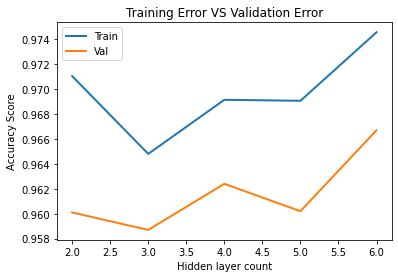

In [16]:
num_hidden_layers = [2, 3, 4, 5, 6]
model_df = pd.DataFrame({'Train': training_accuracy, 'Val': val_scores}, index = num_hidden_layers)

ax = model_df.plot(lw=2, title='Training Error VS Validation Error')
ax.set_xlabel("Hidden layer count")
ax.set_ylabel("Accuracy Score")

### 6 layer model had highest val score, so use this

In [5]:
final_model = MLPClassifier(hidden_layer_sizes= (500, 300, 150, 75, 50), activation='logistic', solver='adam', max_iter=1000, early_stopping=True)
final_model.fit(trainX, trainy)
final_model_predictions = final_model.predict(X_test)
final_model_predictions_accuracy = accuracy_score(y_test, final_model_predictions)
print("Accuracy: {:.4}".format(final_model_predictions_accuracy))

Accuracy: 0.9659


In [32]:
trainX.iloc[0]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 784, dtype: int64

We see the first image in the dataset is a 5, lets see if our model can correctly predict this

KeyError: 0

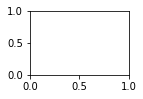

In [37]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

TypeError: Invalid shape (784,) for image data

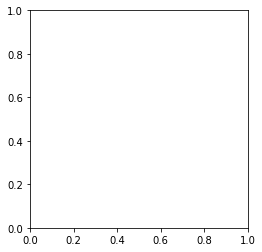

In [29]:
import matplotlib.pyplot as plt
plt.imshow(trainX.iloc[0])
plt.show()

In [12]:
final_model.predict_proba(X_train[0])

KeyError: 0

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

(training_set, testing_set), info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\zachary.oconnor\tensorflow_datasets\mnist\3.0.1.incompleteFC4L6T\mnist-train.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\zachary.oconnor\tensorflow_datasets\mnist\3.0.1.incompleteFC4L6T\mnist-test.tfrecord*...:  …

Dataset mnist downloaded and prepared to C:\Users\zachary.oconnor\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
def normalize_img(image, label):
  # Normalizes images: `uint8` -> `float32`.
  return tf.cast(image, tf.float32) / 255., label

training_set = training_set.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
training_set = training_set.cache()
training_set = training_set.shuffle(info.splits['train'].num_examples)
training_set = training_set.batch(128)
training_set = training_set.prefetch(tf.data.AUTOTUNE)

In [17]:
type(training_set)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [18]:
training_set

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [6]:
testing_set = testing_set.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
testing_set = testing_set.batch(128)
testing_set = testing_set.cache()
testing_set = testing_set.prefetch(tf.data.AUTOTUNE)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
model.fit(
    training_set,
    epochs=6,
    validation_data=testing_set,
)

Epoch 1/6
469/469 [==============================] - 3s 3ms/step - loss: 0.3602 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.1943 - val_sparse_categorical_accuracy: 0.9438
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1687 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.1441 - val_sparse_categorical_accuracy: 0.9568
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1207 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.1092 - val_sparse_categorical_accuracy: 0.9675
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0934 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.0981 - val_sparse_categorical_accuracy: 0.9715
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0950 - val_sparse_categorical_accuracy: 0.9717
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0620 - sparse_categorical_accu

In [11]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [14]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [15]:
model1.fit(
    training_set,
    epochs=6,
    validation_data=testing_set,
)

Epoch 1/6
469/469 [==============================] - 2s 3ms/step - loss: 0.3479 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.1624 - val_sparse_categorical_accuracy: 0.9480
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 0.1240 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.1108 - val_sparse_categorical_accuracy: 0.9662
Epoch 3/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0878 - sparse_categorical_accuracy: 0.9734 - val_loss: 0.0914 - val_sparse_categorical_accuracy: 0.9730
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0890 - val_sparse_categorical_accuracy: 0.9741
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9826 - val_loss: 0.1070 - val_sparse_categorical_accuracy: 0.9685
Epoch 6/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0427 - sparse_categorical_accu